# <span style="color:red">Variable Overview<span>

1. url: the restaurant’s Zomato URL
2. name: the restaurant’s name
3. online_order: whether the restaurant accepts online orders or not (yes/no)
4. book_table: whether the customers can book tables at the restaurant (yes/no)
5. rate: the overall rating given to the restaurant on Zomato (0-5)
6. votes: the number of people who have rated the restaurant
7. location: location of the restaurant
8. rest_type: the type of the restaurant (such as quick bites, casual dining, etc.)
9. cuisines: types of cuisines served at the restaurant
10. approx_cost(for two people): approximate costs for 2 people’s meal (Rupee)
11. listed_in(type): category of the restaurant (delivery, dine-out, etc.)
12. sell_beverages: whether the restaurant sells beverages
13. sell_chinese_food: whether the restaurant sells Chinese food
14. sell_thai_food: whether the restaurant sells Thai food
15. sell_indian_food: whether the restaurant sells Indian food
16. sell_mediterranean_food: whether the restaurant sells Mediterranean food
17. sell_fast_food: whether the restaurant sells fast food
18. sell_desserts: whether the restaurant sells desserts

# <span style="color:red">Libraries<span>

In [ ]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import  OrdinalEncoder,  OneHotEncoder, MinMaxScaler

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# <span style="color:red">Data Preparation<span>

In [2]:
df = pd.read_csv("3B.tsv", sep='\t')
df.head()

,url,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),sell_beverages,sell_chinese_food,sell_thai_food,sell_indian_food,sell_mediterranean_food,sell_fast_food,sell_desserts
0,https://www.zomato.com/bangalore/faasos-1-vasa...,Faasos,Yes,No,3.8,101,Vasanth Nagar,Delivery,"North Indian, Biryani, Fast Food",500,Delivery,no,no,no,yes,no,yes,no
1,https://www.zomato.com/bangalore/khanapur-expr...,Khanapur Express,No,No,NaN,0,JP Nagar,Quick Bites,"North Indian, Rajasthani",500,Delivery,no,no,no,yes,no,no,no
2,https://www.zomato.com/bangalore/russh-gastrop...,Russh Gastropub,No,No,4.2,1279,Church Street,Pub,"Continental, Italian, Burger","1,100",Drinks & nightlife,no,no,no,no,no,yes,no
3,https://www.zomato.com/bangalore/bangalir-rann...,Bangalir Rannaghar,No,No,2.9,58,Bannerghatta Road,Quick Bites,"Bengali, North Indian, Chinese",250,Dine-out,no,yes,no,yes,no,no,no
4,https://www.zomato.com/bangalore/natural-mumba...,Natural Mumbai Kulfi,Yes,No,3.5,8,BTM,Dessert Parlor,Ice Cream,130,Delivery,no,no,no,no,no,no,yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          15000 non-null  object
 1   name                         15000 non-null  object
 2   online_order                 15000 non-null  object
 3   book_table                   15000 non-null  object
 4   rate                         12736 non-null  object
 5   votes                        15000 non-null  int64 
 6   location                     14992 non-null  object
 7   rest_type                    14931 non-null  object
 8   cuisines                     14988 non-null  object
 9   approx_cost(for two people)  14908 non-null  object
 10  listed_in(type)              15000 non-null  object
 11  sell_beverages               14988 non-null  object
 12  sell_chinese_food            14988 non-null  object
 13  sell_thai_food               14

In [4]:
df.shape

(15000, 18)

In [5]:
df.rename(columns = {'name': 'Name'}, inplace = True)
df.rename(columns = {'online_order': 'Online'}, inplace = True)
df.rename(columns = {'rate': 'Rate'}, inplace = True)
df.rename(columns = {'votes': 'Votes'}, inplace = True)
df.rename(columns = {'book_table': 'Book'}, inplace = True)
df.rename(columns = {'location': 'Location'}, inplace = True)
df.rename(columns = {'rest_type': 'Type'}, inplace = True)
df.rename(columns = {'listed_in(type)': 'Service'}, inplace = True)
df.rename(columns = {'approx_cost(for two people)': 'Approx_Cost'}, inplace = True)
df.rename(columns = {'sell_beverages': 'Beverages'}, inplace = True)
df.rename(columns = {'sell_chinese_food': 'Chinese_Food'}, inplace = True)
df.rename(columns = {'sell_thai_food': 'Thai_Food'}, inplace = True)
df.rename(columns = {'sell_indian_food': 'Indian_Food'}, inplace = True)
df.rename(columns = {'sell_fast_food': 'Fast_Food'}, inplace = True)
df.rename(columns = {'sell_desserts': 'Desserts'}, inplace = True)
df.rename(columns = {'sell_mediterranean_food': 'Mediterranean_Food'}, inplace = True)


### Data Type and Value Counts

In [6]:
df.dtypes

url                   object
Name                  object
Online                object
Book                  object
Rate                  object
Votes                  int64
Location              object
Type                  object
cuisines              object
Approx_Cost           object
Service               object
Beverages             object
Chinese_Food          object
Thai_Food             object
Indian_Food           object
Mediterranean_Food    object
Fast_Food             object
Desserts              object
dtype: object

In [7]:
for col in df.columns:
    print(df[col].value_counts())
    print("\n\n")

url
https://www.zomato.com/bangalore/faasos-1-vasanth-nagar?context=eyJzZSI6eyJlIjpbIjE4MzEzNTQyIiwiMTg0MzU2ODgiLCIxODYyNDg5OCIsIjE4NzQwOTQxIiwxODQwNzkxOSwiMTg3OTY3NDUiLCIxODczNTIyOCIsIjU3MjI1IiwiMTg3NDExMTIiLCI1Nzg5MCIsIjE4ODEzMDMwIiwiMTgwMjIyOTMiLCIxODU3OTQ3MCIsIjU0Mjk3IiwiNjExNzIiXSwidCI6IkRlbGl2ZXJ5IFJlc3RhdXJhbnRzIGluIEJUTSJ9fQ==                                                                                                                                    1
https://www.zomato.com/bangalore/kevins-kitchen-koramangala-6th-block-bangalore?context=eyJzZSI6eyJlIjpbIjE4MjA4MzY2IiwiMTg2Njc0NzciLCIxODg4OTkyMyIsIjUzMjg0Iiw1NTYzOSwiNTQ2MTUiLCI1MTAwNyIsIjE4NjU4MzMyIiwiMTgyNTQ2MDAiLCIxODcwNzU4NSIsIjUyMjgxIiwiMTg4NTk2NTIiLCI1ODUzMiIsIjE4NTY2NzEzIiwiNTA2MzQiLCI1MDU4NyIsIjE4ODY1NzA5IiwiMTg2MjYwMjIiLCIxODYzOTY3OSIsIjE4NzE1MTEzIiwiNTEzMzIiLCI1ODQzNCIsIjE4ODkzNzY4Il0sInQiOiJEZWxpdmVyeSBSZXN0YXVyYW50cyBpbiBJbmRpcmFuYWdhciJ9fQ==    1
https://www.zomato.com/bangalore/atithi-hsr?context=eyJzZSI6eyJl

### NA and Duplicate Values

In [8]:
df.isna().sum()

url                      0
Name                     0
Online                   0
Book                     0
Rate                  2264
Votes                    0
Location                 8
Type                    69
cuisines                12
Approx_Cost             92
Service                  0
Beverages               12
Chinese_Food            12
Thai_Food               12
Indian_Food             12
Mediterranean_Food      12
Fast_Food               12
Desserts                12
dtype: int64

We can't just impute mode, mean, median to replace na values as it may introduce bias or inaccurate predictions, which may harm the quality of recommendations

In [9]:
df.dropna(inplace= True)

In [10]:
df.duplicated().sum()

0

# <span style="color:red">Feature Engineering<span>

In [11]:
df.head(1)

,url,Name,Online,Book,Rate,Votes,Location,Type,cuisines,Approx_Cost,Service,Beverages,Chinese_Food,Thai_Food,Indian_Food,Mediterranean_Food,Fast_Food,Desserts
0,https://www.zomato.com/bangalore/faasos-1-vasa...,Faasos,Yes,No,3.8,101,Vasanth Nagar,Delivery,"North Indian, Biryani, Fast Food",500,Delivery,no,no,no,yes,no,yes,no


In [12]:
ny = ['No', 'Yes'] 
bin_col = ['Online', 'Book', 'Beverages', 'Thai_Food','Chinese_Food','Indian_Food', 'Mediterranean_Food', 'Fast_Food', 'Desserts']

In [13]:
num_col = ['Rate', 'Votes', 'Approx_Cost']
cat_col = ['Name', 'Online', 'Location', 'Type', 'Service',
            'Beverages', 'Chinese_Food', 'Thai_Food', 'Indian_Food', 'Mediterranean_Food', 'Fast_Food', 'Desserts']

In [14]:
df[num_col].head(1)

,Rate,Votes,Approx_Cost
0,3.8,101,500


In [15]:
df[cat_col].head(1)

,Name,Online,Location,Type,Service,Beverages,Chinese_Food,Thai_Food,Indian_Food,Mediterranean_Food,Fast_Food,Desserts
0,Faasos,Yes,Vasanth Nagar,Delivery,Delivery,no,no,no,yes,no,yes,no


### Drop url & cuisines

In [16]:
df = df.drop(columns= ['url', 'cuisines'])

Drop unnessesary column such as url.
Cuisines were dropped because it can be repressented by other columns such as if the restaurant's cuisines has 'North Indian', it can be repressented by 'sell_indian_food' and so on.

### Rate - Wrong Data Type and has unexpected value

In [17]:
df['Rate'].value_counts()

Rate
NEW     630
3.9     590
3.7     565
3.8     547
3.7     535
       ... 
2.1       5
4.9       5
2.2       3
2.0       2
1.8       1
Name: count, Length: 63, dtype: int64

In [18]:
df = df[df['Rate'] != 'NEW']

In [19]:
df["Rate"] = pd.to_numeric(df["Rate"], errors='coerce')


In [20]:
df['Rate'].info()

<class 'pandas.core.series.Series'>
Index: 11996 entries, 0 to 14999
Series name: Rate
Non-Null Count  Dtype  
--------------  -----  
11968 non-null  float64
dtypes: float64(1)
memory usage: 187.4 KB


### Approx Cost - Wrong Data Type

In [21]:
df['Approx_Cost'] = df['Approx_Cost'].str.replace(',', '').astype(float)

### Votes - Wrong Values (shouldn't have less than 0)

In [22]:
print(df['Votes'].value_counts())

Votes
4       320
6       261
7       260
9       199
11      197
       ... 
4325      1
943       1
3305      1
1086      1
1708      1
Name: count, Length: 1587, dtype: int64


In [23]:
df = df[df['Votes'] > 0]

### Name - Delete Unreadable Name

In [24]:
print(df['Name'].value_counts())  # Prints all values without truncation


Name
Cafe Coffee Day          29
Onesta                   24
Faasos                   23
Burger King              23
Petoo                    21
                         ..
Goli Vada Pav NO.1        1
Omleterian                1
Le Roll Cafe              1
Soup'ermanz Kitchen       1
Sri Vasavi Restaurant     1
Name: count, Length: 4730, dtype: int64


In [25]:
df = df[~df['Name'].str.contains("Ã", na=False)]

"Ã" in df['Name'].values


False

In [26]:
for col in df.columns:
    print(df[col].value_counts())
    print()

Name
Cafe Coffee Day             29
Onesta                      24
Faasos                      23
Burger King                 23
Petoo                       21
                            ..
The Chameleon                1
Aniram's                     1
Hotel Nisarga Restaurant     1
Aashish Foods                1
Sri Vasavi Restaurant        1
Name: count, Length: 4681, dtype: int64

Online
Yes    7805
No     4077
Name: count, dtype: int64

Book
No     10056
Yes     1826
Name: count, dtype: int64

Rate
3.7    1094
3.9    1070
3.8    1049
3.6     959
4.0     941
4.1     859
3.5     798
3.4     729
3.3     669
4.2     623
3.2     516
3.1     456
4.3     450
4.4     337
3.0     277
2.9     242
4.5     200
2.8     167
4.6      95
2.7      89
2.6      80
4.7      52
2.5      31
4.8      22
2.3      19
2.4      17
4.9      17
2.1      12
2.2       9
2.0       2
1.8       1
Name: count, dtype: int64

Votes
4        319
6        261
7        260
11       196
9        194
        ... 
1295     

### Inconsistent Binary Value

In [27]:
change_col = ['Beverages', 'Thai_Food', 'Chinese_Food','Indian_Food', 'Mediterranean_Food', 'Fast_Food', 'Desserts']
df[change_col] = df[change_col].apply(lambda col: col.str.capitalize())

print(df[change_col].head())

  Beverages Thai_Food Chinese_Food Indian_Food Mediterranean_Food Fast_Food  \
0        No        No           No         Yes                 No       Yes   
2        No        No           No          No                 No       Yes   
3        No        No          Yes         Yes                 No        No   
4        No        No           No          No                 No        No   
5       Yes        No           No          No                 No       Yes   

  Desserts  
0       No  
2       No  
3       No  
4      Yes  
5       No  


In [28]:
df.isna().sum()

Name                  0
Online                0
Book                  0
Rate                  0
Votes                 0
Location              0
Type                  0
Approx_Cost           0
Service               0
Beverages             0
Chinese_Food          0
Thai_Food             0
Indian_Food           0
Mediterranean_Food    0
Fast_Food             0
Desserts              0
dtype: int64

In [29]:
df.duplicated().sum()

1777

### Group By

We group by Name to consolidate duplicate entries for the same entity, ensuring consistency across attributes like Online, Type, and Location, while summarizing numerical metrics like Rate (average) and Votes (sum) for meaningful analysis. 

In [30]:
df = df.groupby('Name').agg(
    Online=('Online', 'first'),  # Assuming the 'Online' status is consistent per Name
    Book=('Book', 'first'),  # Assuming the 'Book' status is consistent per Name
    Rate=('Rate', 'mean'),  # Average Rate
    Votes=('Votes', 'sum'),  # Total Votes
    Location=('Location', 'first'),  # Assuming the Location is consistent per Name
    Type=('Type', 'first'),  # Assuming the Type is consistent per Name
    Approx_Cost=('Approx_Cost', 'mean'),  # Average Approx Cost
    Service=('Service', 'first'),  # Assuming the Category is consistent per Name
    Beverages=('Beverages', 'first'),  # Assuming Beverages is consistent per Name
    Chinese_Food=('Chinese_Food', 'first'),  # Assuming Chinese Food is consistent per Name
    Thai_Food=('Thai_Food', 'first'),  # Assuming Thai Food is consistent per Name
    Indian_Food=('Indian_Food', 'first'),  # Assuming Indian Food is consistent per Name
    Mediterranean_Food=('Mediterranean_Food', 'first'),  # Assuming Mediterranean Food is consistent per Name
    Fast_Food=('Fast_Food', 'first'),  # Assuming Fast Food is consistent per Name
    Desserts=('Desserts', 'first')  # Assuming Desserts is consistent per Name
).reset_index()

# Display the resulting aggregated DataFrame
df


,Name,Online,Book,Rate,Votes,Location,Type,Approx_Cost,Service,Beverages,Chinese_Food,Thai_Food,Indian_Food,Mediterranean_Food,Fast_Food,Desserts
0,#FeelTheROLL,No,No,3.400000,7,Bellandur,Quick Bites,200.0,Delivery,No,No,No,No,No,Yes,No
1,#L-81 Cafe,Yes,No,3.900000,96,HSR,Quick Bites,400.0,Delivery,Yes,No,No,No,No,Yes,No
2,1000 B.C,Yes,No,3.200000,98,Koramangala 5th Block,Quick Bites,300.0,Delivery,No,No,No,No,No,Yes,No
3,11 to 11 Express Biriyanis,Yes,No,3.500000,22,Electronic City,Quick Bites,300.0,Dine-out,No,No,No,Yes,No,No,No
4,1131 Bar + Kitchen,No,Yes,4.500000,5646,Indiranagar,"Bar, Casual Dining",1500.0,Dine-out,No,No,No,Yes,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4676,i-Bar - The Park Bangalore,No,No,3.800000,3103,MG Road,Lounge,3000.0,Drinks & nightlife,No,Yes,No,Yes,Yes,No,No
4677,iFruit Live Ice Creams,No,No,3.400000,10,Koramangala 1st Block,Dessert Parlor,300.0,Desserts,No,No,No,No,No,No,Yes
4678,iSpice Resto Cafe,Yes,No,3.700000,56,Indiranagar,Cafe,600.0,Cafes,Yes,Yes,No,Yes,No,Yes,No
4679,nu.tree,Yes,No,4.333333,610,Whitefield,Quick Bites,400.0,Dine-out,Yes,No,No,Yes,No,No,No


In [31]:
df_recommend = df.copy()

### Weighted

High ratings often indicate quality, but a restaurant with very few votes may not be reliable.
Weighting the rating by the number of votes ensures that restaurants with a substantial number of reviews are given more weight, reflecting a broader consensus.

In [32]:
max_votes = df['Votes'].max()
df['Weighted'] = (df['Rate'] * df['Votes']) / max_votes
df[['Name', 'Rate', 'Votes', 'Weighted']].head(10)

,Name,Rate,Votes,Weighted
0,#FeelTheROLL,3.400000,7,0.000217
1,#L-81 Cafe,3.900000,96,0.003413
2,1000 B.C,3.200000,98,0.002859
3,11 to 11 Express Biriyanis,3.500000,22,0.000702
4,1131 Bar + Kitchen,4.500000,5646,0.231613
5,12th Main - Grand Mercure,4.100000,1061,0.039656
6,1522 - The Pub,4.218182,17604,0.676933
7,154 Breakfast Club,4.000000,6055,0.220792
8,1722 Urban Bistro,4.100000,885,0.033078
9,1947,4.050000,6498,0.239908


# <span style="color:red">EDA<span>

### Distribution

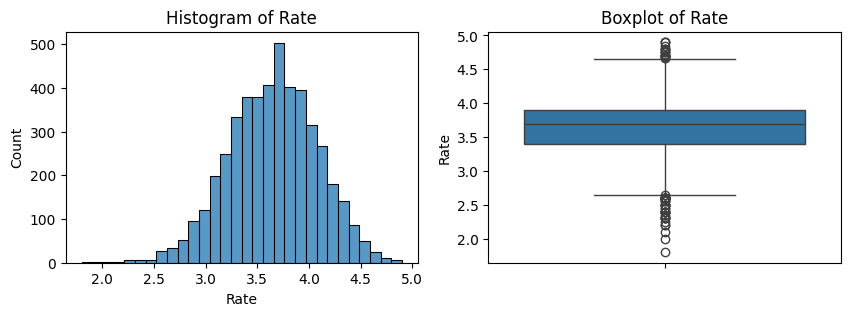

Skewness of Rate: -0.16123181011942023
Kurtosis of Rate: 0.02840923256792216


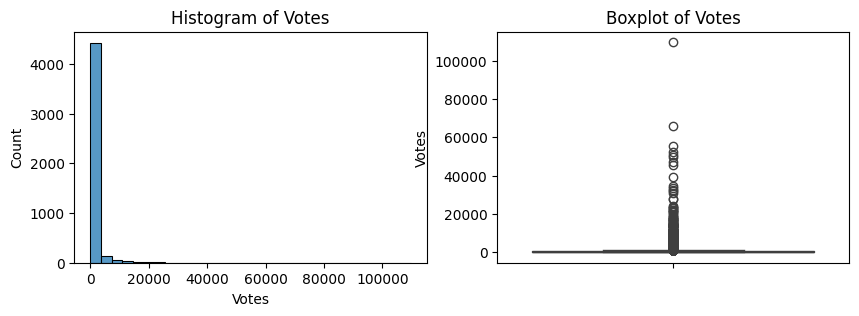

Skewness of Votes: 12.844595250370745
Kurtosis of Votes: 260.05788745228006


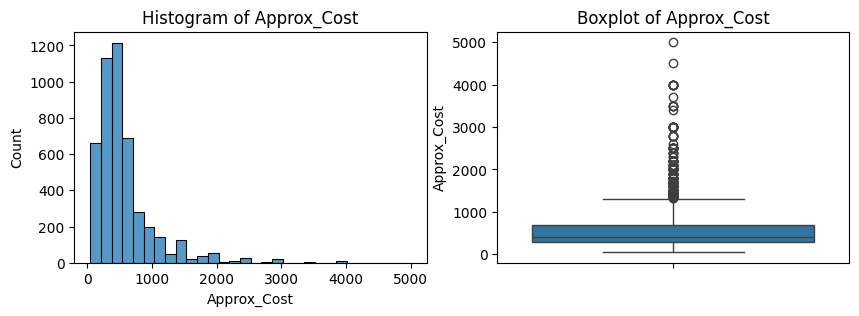

Skewness of Approx_Cost: 2.8881886693881778
Kurtosis of Approx_Cost: 12.268529818769338


In [33]:
def check_distribution_outliers(df, columns):
    for col in columns:
        plt.figure(figsize=(10, 3))

        plt.subplot(1, 2, 1)
        sns.histplot(df[col], bins=30)
        plt.title(f'Histogram of {col}')

        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[col])
        plt.title(f'Boxplot of {col}')

        plt.show()

        print(f'Skewness of {col}:', df[col].skew())
        print(f'Kurtosis of {col}:', df[col].kurt())

check_distribution_outliers(df[num_col], num_col)

### Categorical Feature

In [34]:
for col in cat_col:
  print(df[col].value_counts(), '\n')

Name
#FeelTheROLL                                    1
Pita Pit                                        1
Polar Bear                                      1
Polamma's Mess                                  1
Poha On Wheels                                  1
                                               ..
Giselle Resto Cafe                              1
Ginseng - Royal Orchid Hotel                    1
Ginger Greens                                   1
Ginger & Garlic                                 1
re:cess - Hilton Bangalore Embassy GolfLinks    1
Name: count, Length: 4681, dtype: int64 

Online
Yes    2814
No     1867
Name: count, dtype: int64 

Location
BTM               367
HSR               254
Marathahalli      241
Whitefield        239
Indiranagar       198
                 ... 
Mysore Road         2
Kengeri             1
Yelahanka           1
West Bangalore      1
Langford Town       1
Name: count, Length: 88, dtype: int64 

Type
Quick Bites                   1774
Casual Dining

### Numerical Feature

In [35]:
df[num_col].describe()

,Rate,Votes,Approx_Cost
count,4681.000000,4681.000000,4681.000000
mean,3.644773,905.195898,573.699208
std,0.416434,3602.690310,477.422111
min,1.800000,2.000000,50.000000
25%,3.400000,26.000000,300.000000
50%,3.700000,104.000000,400.000000
75%,3.900000,424.000000,700.000000
max,4.900000,109696.000000,5000.000000


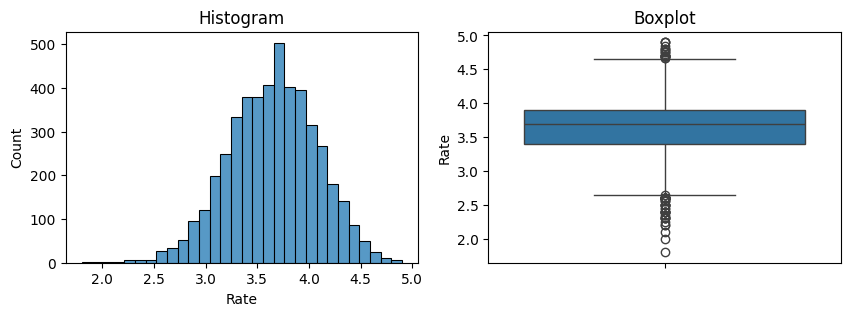

Skewness: -0.16123181011942023
Kurtosis: 0.02840923256792216


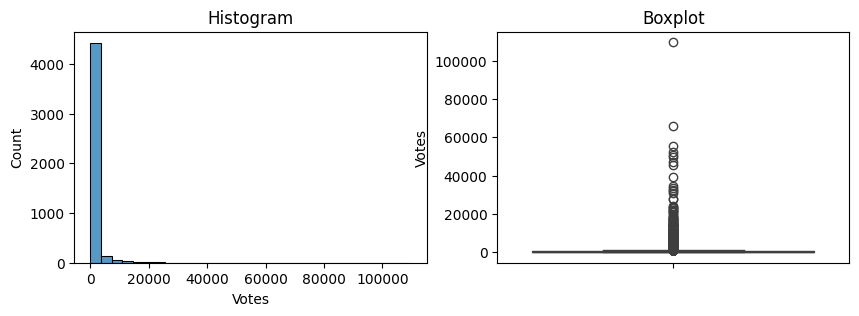

Skewness: 12.844595250370745
Kurtosis: 260.05788745228006


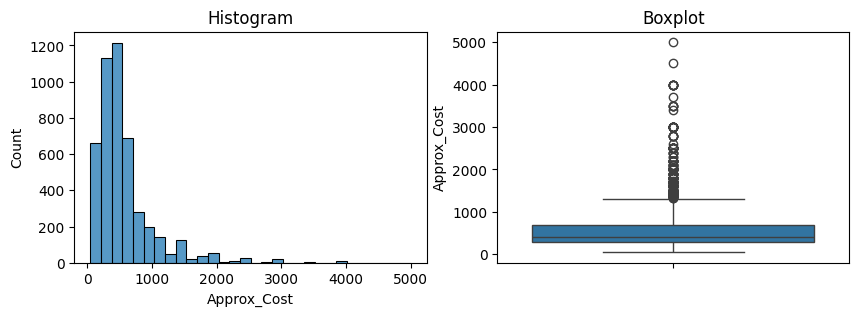

Skewness: 2.8881886693881778
Kurtosis: 12.268529818769338


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
def check_distribution_outliers(df, columns):
    for col in columns:
        plt.figure(figsize=(10, 3))

        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df[col], bins=30)
        plt.title('Histogram')

        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[col])
        plt.title('Boxplot')

        plt.show()

        print('Skewness:', df[col].skew())
        print('Kurtosis:', df[col].kurt())

check_distribution_outliers(df[num_col], num_col)

### <span style="color:red">Top Restaurant

In [37]:
top = df.sort_values(by='Weighted', ascending=False).head(10)

top[['Name', 'Rate', 'Votes', 'Weighted']].reset_index(drop=True)

,Name,Rate,Votes,Weighted
0,Onesta,4.437500,109696,4.437500
1,Truffles,4.581818,66125,2.761930
2,Hammered,4.573333,55545,2.315725
3,The Black Pearl,4.700000,52607,2.253983
4,Byg Brewski Brewing Company,4.900000,49522,2.212093
5,Hoot,4.200000,50790,1.944629
6,Big Pitcher,4.660000,45675,1.940321
7,Empire Restaurant,4.000000,47024,1.714702
8,Prost Brew Pub,4.500000,39296,1.612019
9,House Of Commons,4.725000,34632,1.491724


Onesta is ranked the highest due to its combination of a relatively high rating (4.437500) and a very large number of votes (109696), giving it the highest weighted score.
Other restaurants like Truffles and Hammered rank highly due to strong ratings and considerable votes but are lower than Onesta due to fewer votes.

A high rating alone doesn't guarantee a top spot, it's the combination of rating and votes that matters.
For example, even though Byg Brewski Brewing Company has the highest Rate (4.9), it ranks fifth due to fewer votes compared to higher-ranked restaurants.

### Restaurant Type

In order to get the most restaurant type in the data, we need to split by ',' then Calculate the counts for each unique type

In [38]:
type_dummies = df['Type'].str.get_dummies(sep=', ')
type_counts = type_dummies.sum().sort_values(ascending=False)

C:\Users\win10\AppData\Local\Temp\ipykernel_35088\1374110994.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data_counts.index, y=data_counts.values, palette="viridis")


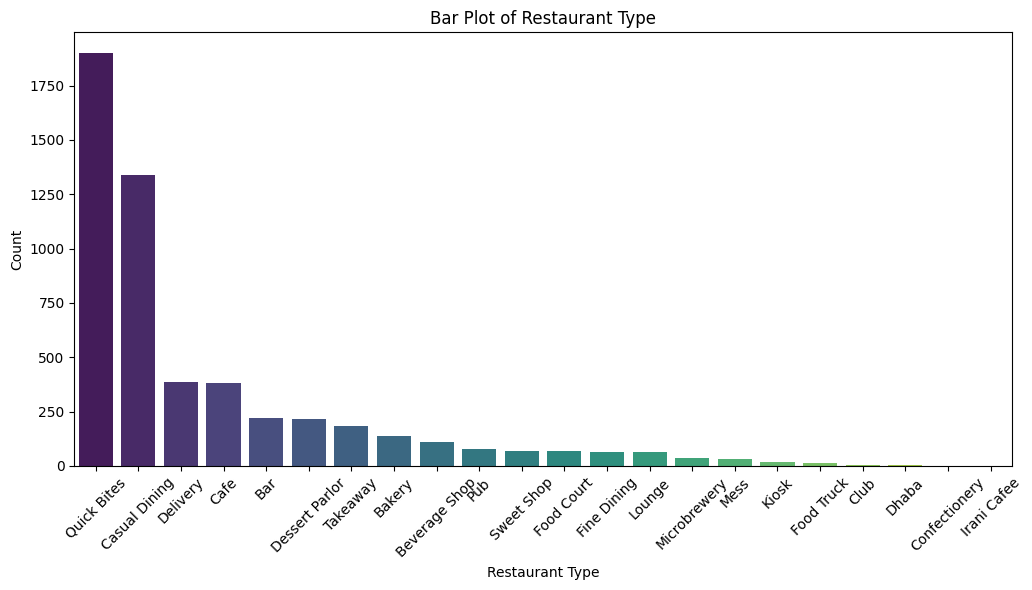

In [65]:
def cat_graph(data_counts, title):
    plt.figure(figsize=(20, 6))
    # Bar Plot
    plt.subplot(1, 2, 2)
    sns.barplot(x=data_counts.index, y=data_counts.values, palette="viridis")
    plt.title(f'Bar Plot of {title}')
    plt.xlabel(title)
    plt.ylabel('Count')
    plt.xticks(rotation= 45)

    plt.tight_layout()
    plt.show()

# Call the function with normalized counts
cat_graph(type_counts, 'Restaurant Type')

1. Quick Bites is the most popular type, followed by Casual Dining. These two categories are significantly more common than others, indicating that most restaurants cater to fast and casual dining experiences.
2. "Delivery" and "Cafe" have a moderate presence, suggesting a notable demand for food delivery services and casual coffee shop-style settings.
This aligns with modern trends where convenience and casual dining experiences are valued.
3. The distribution may vary based on the geographic region or demographic preferences, example: urban areas may have more "Quick Bites" and "Casual Dining," while rural or suburban areas may see different trends.

### Service Type

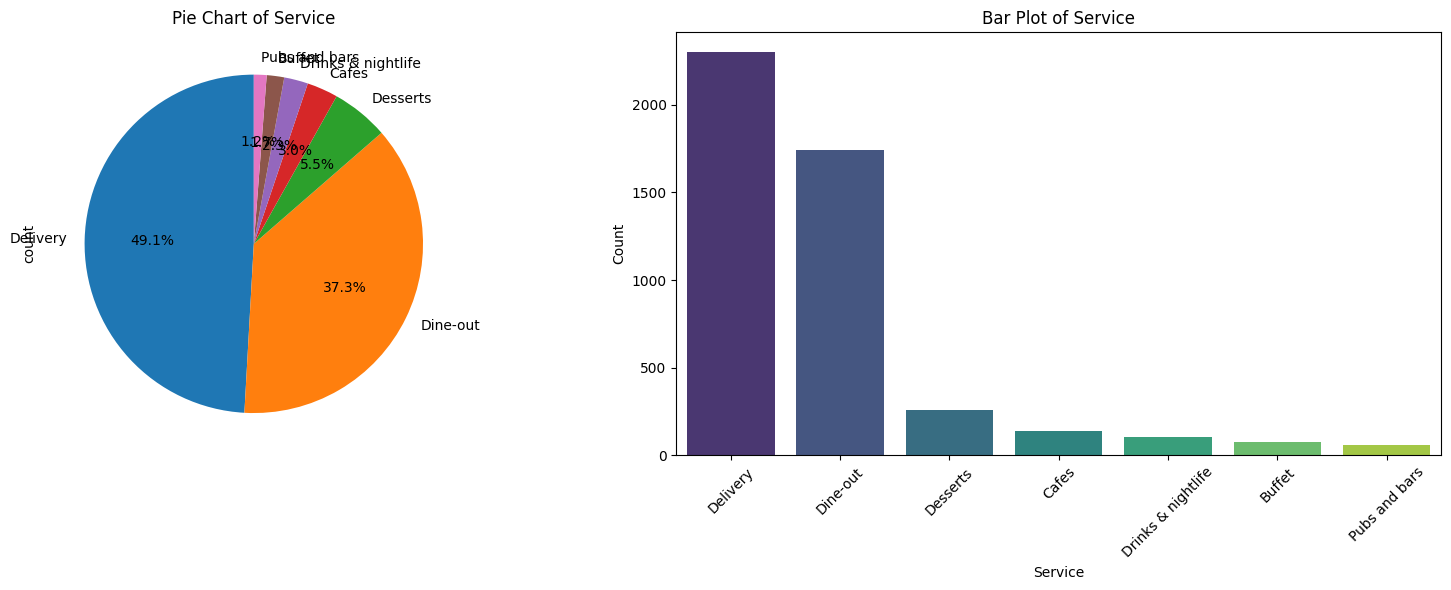

In [40]:
def cat_graph(df, columns):
    for col in columns:
        plt.figure(figsize=(16, 6))

        plt.subplot(1, 2, 1)
        df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
        plt.title(f'Pie Chart of {col}')

        plt.subplot(1, 2, 2)
        sorted_counts = df[col].value_counts().sort_values(ascending=False)
        sns.barplot(x=sorted_counts.index, y=sorted_counts.values, hue=sorted_counts.index, palette="viridis")
        plt.title(f'Bar Plot of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)

        plt.tight_layout()
        plt.show()

cat_graph(df, ['Service'])

1. Delivery is the most popular service, accounting for nearly half of all services. This reflects the growing demand for convenience and at-home dining, which could be influenced by factors like busy lifestyles or post-pandemic preferences.
2. Dine-Out is the second most popular service. Despite the popularity of delivery, dining out remains a significant choice, likely due to the social aspect and experience it provides.
3. Drinks & Nightlife, Buffet, and Pubs and Bars have a smaller share, indicating that these are niche services catering to specific customer segments.

### Food Type

In [41]:
columns = ['Beverages', 'Chinese_Food', 'Thai_Food', 'Indian_Food', 
            'Mediterranean_Food', 'Fast_Food', 'Desserts']
food_counts = df[columns].apply(lambda col: col.str.lower().value_counts().get('yes', 0))

C:\Users\win10\AppData\Local\Temp\ipykernel_35088\2957660117.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=food_counts.index, y=food_counts.values, palette="viridis")


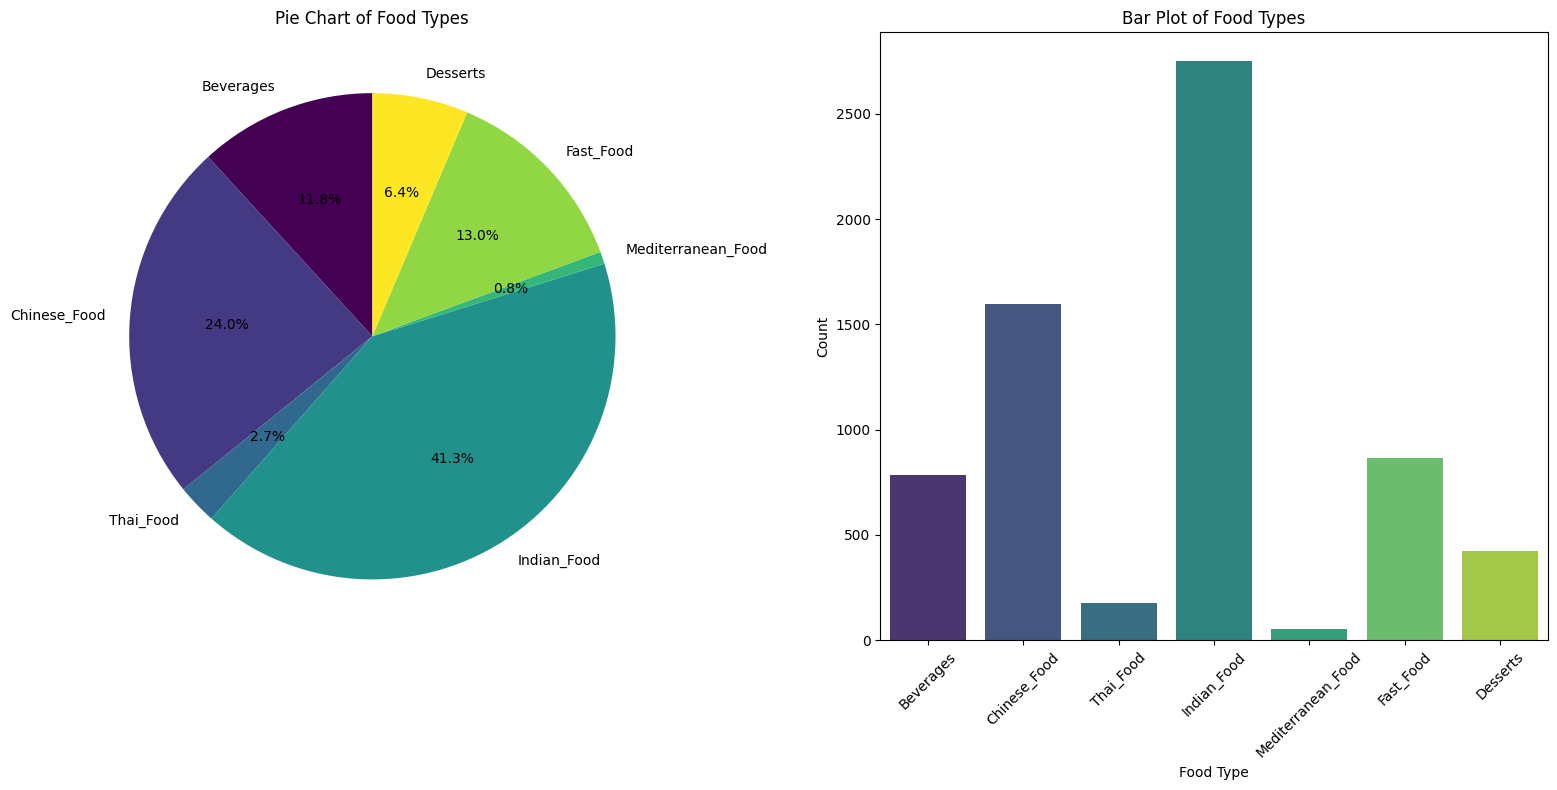

In [42]:
def plot_food_types(food_counts):
    plt.figure(figsize=(16, 8))

    
    plt.subplot(1, 2, 1)
    food_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap="viridis")
    plt.title('Pie Chart of Food Types')
    plt.ylabel('')  # Remove y-axis label for better aesthetics

    
    plt.subplot(1, 2, 2)
    sns.barplot(x=food_counts.index, y=food_counts.values, palette="viridis")
    plt.title('Bar Plot of Food Types')
    plt.xlabel('Food Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    
    plt.tight_layout()
    plt.show()


plot_food_types(food_counts)

1. Indian food dominates the chart. This indicates that Indian cuisine is the most popular choice among customers, possibly due to its widespread cultural influence or demand within the region.
2. Chinese food follows as the second most popular category with 24%. Its substantial share highlights its appeal as a versatile and widely liked cuisine, catering to various preferences.
3. Fast food accounts for 13%, reflecting a significant interest in quick and convenient dining options. This aligns with modern trends of busy lifestyles and on-the-go meals.

### Online

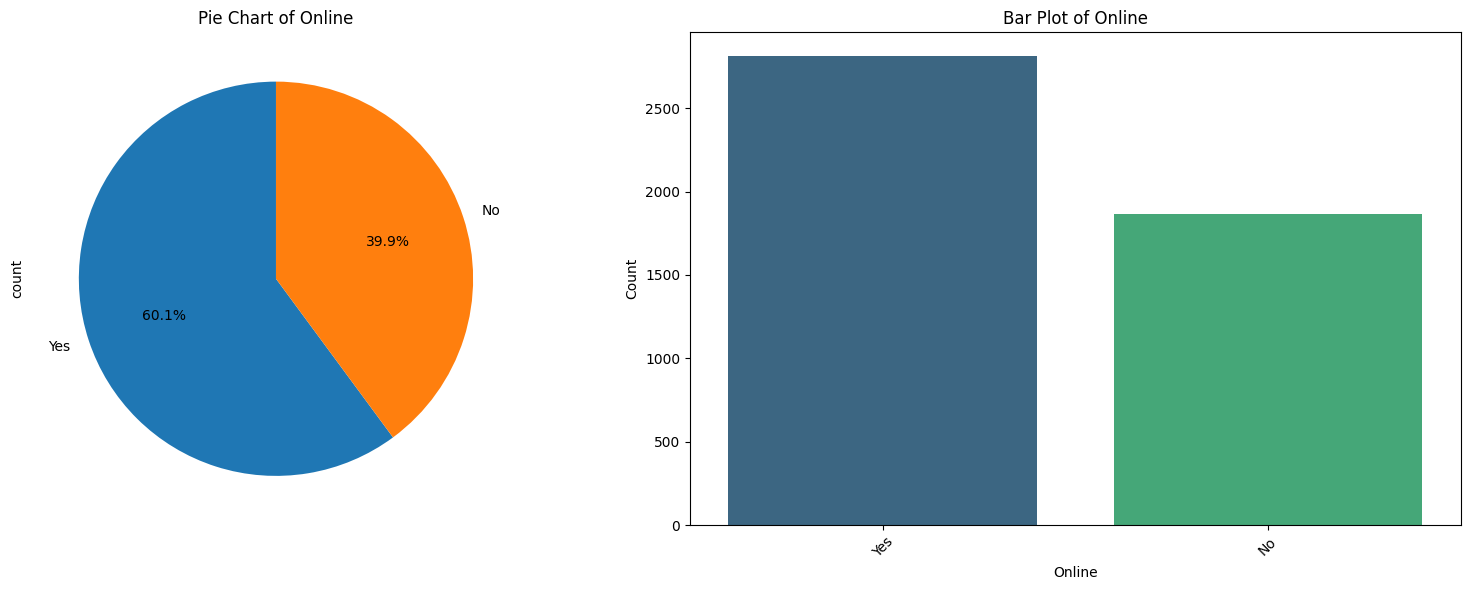

In [43]:
cat_graph(df, ['Online'])

60.1% of the restaurants support online services, while 39.9% do not.
The majority of restaurants have adapted to online platforms, indicating a strong demand for digital ordering, likely driven by customer convenience and trends such as food delivery services. I think for restaurants without online services should consider adopting online platforms to remain competitive and tap into the delivery market.

### Book

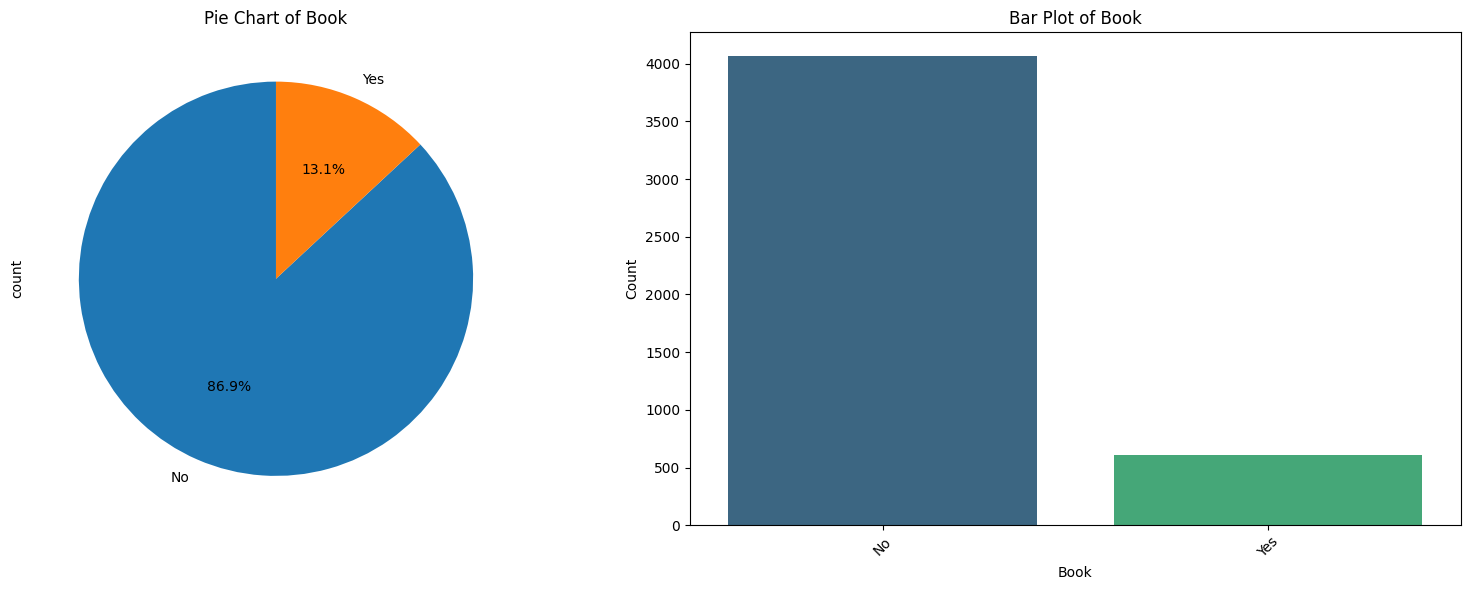

In [44]:
cat_graph(df, ['Book'])

Only 13.1% of restaurants allow table booking, while 86.9% do not.
The significantly smaller percentage of table booking suggests that either most restaurants operate in casual or quick dining formats, havve a limited seating with high demand or customers generally do not prioritize advance table reservations. Where restaurants with high demand or limited seating should implement table booking systems to manage customer flow and enhance the dining experience.

# <span style="color:red">Encoding<span>

### One Hot Encoding

In [45]:
df = pd.concat([df, type_dummies], axis=1)

In [46]:
ohe_enc = OneHotEncoder(sparse_output=False)
oh_encoded = ohe_enc.fit_transform(df[['Service']])
one_hot_df = pd.DataFrame(oh_encoded, columns=ohe_enc.get_feature_names_out(['Service']))
one_hot_df.index = df.index
df = pd.concat([df.drop(columns=['Service']), one_hot_df.astype('int')], axis=1)

### Binary

In [47]:
df.columns

Index(['Name', 'Online', 'Book', 'Rate', 'Votes', 'Location', 'Type',
       'Approx_Cost', 'Beverages', 'Chinese_Food', 'Thai_Food', 'Indian_Food',
       'Mediterranean_Food', 'Fast_Food', 'Desserts', 'Weighted', 'Bakery',
       'Bar', 'Beverage Shop', 'Cafe', 'Casual Dining', 'Club',
       'Confectionery', 'Delivery', 'Dessert Parlor', 'Dhaba', 'Fine Dining',
       'Food Court', 'Food Truck', 'Irani Cafee', 'Kiosk', 'Lounge', 'Mess',
       'Microbrewery', 'Pub', 'Quick Bites', 'Sweet Shop', 'Takeaway',
       'Service_Buffet', 'Service_Cafes', 'Service_Delivery',
       'Service_Desserts', 'Service_Dine-out', 'Service_Drinks & nightlife',
       'Service_Pubs and bars'],
      dtype='object')

In [48]:
ord = OrdinalEncoder(categories=[ny])
for col in bin_col:
    df[col] = ord.fit_transform(df[[col]])

In [49]:
df.head(5)

,Name,Online,Book,Rate,Votes,Location,Type,Approx_Cost,Beverages,Chinese_Food,...,Quick Bites,Sweet Shop,Takeaway,Service_Buffet,Service_Cafes,Service_Delivery,Service_Desserts,Service_Dine-out,Service_Drinks & nightlife,Service_Pubs and bars
0,#FeelTheROLL,0.0,0.0,3.4,7,Bellandur,Quick Bites,200.0,0.0,0.0,...,1,0,0,0,0,1,0,0,0,0
1,#L-81 Cafe,1.0,0.0,3.9,96,HSR,Quick Bites,400.0,1.0,0.0,...,1,0,0,0,0,1,0,0,0,0
2,1000 B.C,1.0,0.0,3.2,98,Koramangala 5th Block,Quick Bites,300.0,0.0,0.0,...,1,0,0,0,0,1,0,0,0,0
3,11 to 11 Express Biriyanis,1.0,0.0,3.5,22,Electronic City,Quick Bites,300.0,0.0,0.0,...,1,0,0,0,0,0,0,1,0,0
4,1131 Bar + Kitchen,0.0,1.0,4.5,5646,Indiranagar,"Bar, Casual Dining",1500.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0


# <span style="color:red">Scaling<span>

In [50]:
scaler = MinMaxScaler()
df[['Approx_Cost']] = scaler.fit_transform(df[['Approx_Cost']])

In [51]:
df.head()

,Name,Online,Book,Rate,Votes,Location,Type,Approx_Cost,Beverages,Chinese_Food,...,Quick Bites,Sweet Shop,Takeaway,Service_Buffet,Service_Cafes,Service_Delivery,Service_Desserts,Service_Dine-out,Service_Drinks & nightlife,Service_Pubs and bars
0,#FeelTheROLL,0.0,0.0,3.4,7,Bellandur,Quick Bites,0.030303,0.0,0.0,...,1,0,0,0,0,1,0,0,0,0
1,#L-81 Cafe,1.0,0.0,3.9,96,HSR,Quick Bites,0.070707,1.0,0.0,...,1,0,0,0,0,1,0,0,0,0
2,1000 B.C,1.0,0.0,3.2,98,Koramangala 5th Block,Quick Bites,0.050505,0.0,0.0,...,1,0,0,0,0,1,0,0,0,0
3,11 to 11 Express Biriyanis,1.0,0.0,3.5,22,Electronic City,Quick Bites,0.050505,0.0,0.0,...,1,0,0,0,0,0,0,1,0,0
4,1131 Bar + Kitchen,0.0,1.0,4.5,5646,Indiranagar,"Bar, Casual Dining",0.292929,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0


# <span style="color:red">Recommendation System

In [ ]:
tfidf = TfidfVectorizer(stop_words='english')
loc_tfidf = tfidf.fit_transform(df['Location'])

In [ ]:
features = np.hstack([
    loc_tfidf.toarray(),
    df[['Online', 'Book', 'Approx_Cost', 'Beverages',
       'Chinese_Food', 'Thai_Food', 'Indian_Food', 'Mediterranean_Food',
       'Fast_Food', 'Desserts', 'Bakery', 'Bar', 'Beverage Shop', 'Cafe',
       'Casual Dining', 'Club', 'Confectionery', 'Delivery', 'Dessert Parlor',
       'Dhaba', 'Fine Dining', 'Food Court', 'Food Truck', 'Irani Cafee',
       'Kiosk', 'Lounge', 'Mess', 'Microbrewery', 'Pub', 'Quick Bites',
       'Sweet Shop', 'Takeaway', 'Service_Buffet', 'Service_Cafes',
       'Service_Delivery', 'Service_Desserts', 'Service_Dine-out',
       'Service_Drinks & nightlife', 'Service_Pubs and bars']].values
])

In a content-based recommendation system, attributes like Rate and Votes are not included because they reflect popularity or user preference rather than the intrinsic features of the item. The system focuses on item-specific characteristics such as location, cuisine, service type to match user preferences without being influenced by external popularity metrics.

In [54]:
cos_sim = cosine_similarity(features, features)
cos_sim_df = pd.DataFrame(cos_sim, index=df['Name'], columns=df['Name'])

In [55]:
def recommend(game_name,n = 5):
    sim_scores = cos_sim_df[game_name].sort_values(ascending=False)
    sim_scores = sim_scores.drop(game_name)
    tops = sim_scores.head(n)
    return tops.index.tolist()

In [61]:
df_recommend = df_recommend.drop(columns= ['Rate', 'Votes'])

# <span style="color:red">Test 1 - iSpice Resto Cafe

In [62]:
tops = recommend('iSpice Resto Cafe')
df_recommend[df_recommend['Name'].isin(tops)].reset_index(drop=True)

,Name,Online,Book,Location,Type,Approx_Cost,Service,Beverages,Chinese_Food,Thai_Food,Indian_Food,Mediterranean_Food,Fast_Food,Desserts
0,Bean Flickers,Yes,No,Indiranagar,Cafe,700.0,Cafes,Yes,No,No,No,No,Yes,No
1,Cafe Happytizing,Yes,No,Electronic City,Cafe,700.0,Cafes,Yes,No,No,Yes,No,Yes,No
2,Cafe Mandala,Yes,No,New BEL Road,Cafe,600.0,Cafes,Yes,Yes,No,Yes,No,Yes,No
3,Entropy Cafe,Yes,No,Koramangala 6th Block,Cafe,600.0,Cafes,Yes,Yes,No,Yes,No,Yes,No
4,That Garage Cafe,Yes,No,HSR,Cafe,650.0,Cafes,Yes,Yes,No,Yes,No,No,No


The objective of the recommender system in this test is to identify and suggest cafes similar to "iSpice Resto Cafe". The system appears to analyze attributes like food types, cost, and services to recommend relevant alternatives effectively by looking at the restaurant type is "Cafe". 

# <span style="color:red">Test 2 - 12th Main - Grand Mercure

In [63]:
tops = recommend('12th Main - Grand Mercure')
df_recommend[df_recommend['Name'].isin(tops)].reset_index(drop=True)

,Name,Online,Book,Location,Type,Approx_Cost,Service,Beverages,Chinese_Food,Thai_Food,Indian_Food,Mediterranean_Food,Fast_Food,Desserts
0,Fish Factory-Citrus Hotel,No,Yes,Cunningham Road,Fine Dining,2600.0,Dine-out,No,No,No,No,No,No,No
1,Karavalli - The Gateway Hotel,No,Yes,Residency Road,Fine Dining,3500.0,Dine-out,No,No,No,No,No,No,No
2,Lotus Pavilion - ITC Gardenia,No,Yes,Richmond Road,Fine Dining,3000.0,Dine-out,No,No,No,No,No,No,No
3,Ottimo - ITC Gardenia,No,Yes,Richmond Road,Fine Dining,3000.0,Dine-out,No,No,No,No,No,No,No
4,Yataii - Shangri-La Hotel,No,Yes,Vasanth Nagar,Fine Dining,2300.0,Dine-out,No,No,No,No,No,No,No


The recommender system performs well in providing relevant recommendations based on the context. For "12th Main - Grand Mercure," the system identifies other fine-dining restaurants with similar characteristics, such as "Dine-out" service and comparable price ranges. 

# <span style="color:red">Test 3 - 1722 Urban Bistro

In [64]:
tops = recommend('1722 Urban Bistro')
df_recommend[df_recommend['Name'].isin(tops)].reset_index(drop=True)

,Name,Online,Book,Location,Type,Approx_Cost,Service,Beverages,Chinese_Food,Thai_Food,Indian_Food,Mediterranean_Food,Fast_Food,Desserts
0,Desi Cream Junction,Yes,Yes,Jayanagar,Casual Dining,650.0,Dine-out,No,Yes,No,Yes,No,Yes,No
1,Desipun,Yes,Yes,Koramangala 5th Block,Casual Dining,600.0,Dine-out,No,No,No,Yes,No,No,No
2,Karavali Grand,Yes,No,Koramangala 5th Block,Casual Dining,600.0,Dine-out,No,Yes,No,Yes,No,No,No
3,Kopper Kadai,Yes,Yes,Koramangala 5th Block,Casual Dining,1200.0,Dine-out,No,Yes,No,Yes,No,No,No
4,Ulavacharu,Yes,Yes,Koramangala 5th Block,Casual Dining,900.0,Dine-out,No,Yes,No,Yes,No,No,No


In this test, the recommender system aims to find casual dining establishments similar to "1722 Urban Bistro." The recommendations provided align with the target's characteristics, such as being casual dining venues with a "Dine-out" service and a similar price range. However, there is some variation in cost, and the results predominantly focus on similar dining types and services.

# <span style="color:red">Conclusion

The recommender system does a good job of identifying similar establishments based on type, service, and approximate cost. For future efforts, variables such as ambiance, special features such as live music or outdoor seating, or user-defined preferences could be incorporated to make the system even more versatile.

As we saw in the tests, while the system successfully identified similar establishments, it sometimes lacked deeper contextual matching, such as suggesting options with unique blends of multiple cuisines or exploring similar venues in slightly different dining categories.
